### Titanic Survival Prediction

You are a data scientist / AI engineer working on a binary classification problem to predict the survival of passengers from the Titanic crash. You have been provided with a dataset named **`"titanic.csv"`** which includes various features of passengers to predict whether they survived or not. The dataset comprises the following columns:

- `passenger_id:` The unique identifier for each passenger.
- `name:` The name of the passenger.
- `p_class:` The passenger class (1 = 1st class, 2 = 2nd class, 3 = 3rd class).
- `sex:` The gender of the passenger.
- `age:` The age of the passenger.
- `sib_sp:` The number of siblings or spouses the passenger had aboard the Titanic.
- `parch:` The number of parents or children the passenger had aboard the Titanic.
- `ticket:` The ticket number of the passenger.
- `fare:` The fare the passenger paid for the ticket.
- `cabin:` The cabin number where the passenger stayed.
- `embarked:` The port where the passenger boarded the Titanic (C = Cherbourg; Q = Queenstown; S = Southampton).
- `survived:` Whether the passenger survived (1) or not (0).

Your task is to use this dataset to build and evaluate a `Gaussian Naive Bayes` model to predict whether a passenger survived based on their features. You will also evaluate the model's performance using precision, recall, and other classification metrics.

### Data Preparation and Exploration

In [135]:
import pandas as pd

df = pd.read_csv("titanic.csv")
df.shape

(891, 12)

In [136]:
df.head()

,passenger_id,name,p_class,sex,age,sib_sp,parch,ticket,fare,cabin,embarked,survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,NaN,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [137]:
# Check for any missing values in the dataset 
df.isna().sum()

passenger_id      0
name              0
p_class           0
sex               0
age             177
sib_sp            0
parch             0
ticket            0
fare              9
cabin           687
embarked          2
survived          0
dtype: int64

In [138]:
# Step 5: Drop columns that do not add much value (passenger_id, name, sib_sp, parch, ticket, cabin, embarked)
df.drop(["passenger_id", "name", "sib_sp", "parch", "ticket", "cabin", "embarked"],axis = 1, inplace = True)
df.columns

Index(['p_class', 'sex', 'age', 'fare', 'survived'], dtype='object')

## Visualization

C:\Users\DELL\AppData\Local\Temp\ipykernel_5496\2390797653.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='survived', data=df, palette='Set2')


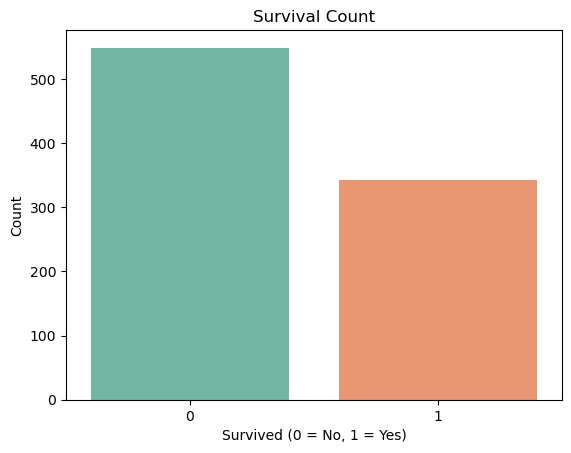

In [140]:
# Visualize the distribution of survived
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='survived', data=df, palette='Set2')
plt.title('Survival Count')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

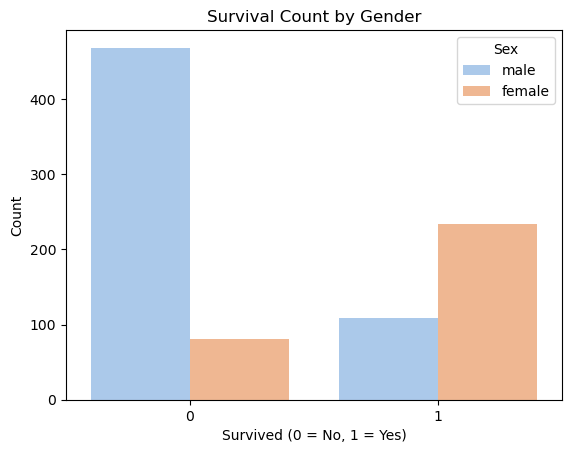

In [141]:
sns.countplot(x='survived', hue='sex', data=df, palette='pastel')
plt.title('Survival Count by Gender')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Sex')
plt.show()

In [142]:
df["p_class"].head()

0    3
1    1
2    3
3    1
4    3
Name: p_class, dtype: int64

C:\Users\DELL\AppData\Local\Temp\ipykernel_5496\665604302.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='p_class', data=df, palette='Set2')


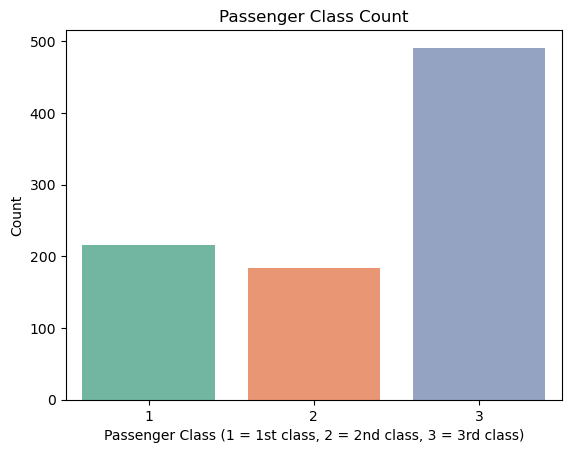

In [143]:
# 'p_class'
sns.countplot(x='p_class', data=df, palette='Set2')
plt.title('Passenger Class Count')
plt.xlabel('Passenger Class (1 = 1st class, 2 = 2nd class, 3 = 3rd class)')
plt.ylabel('Count')
plt.show()

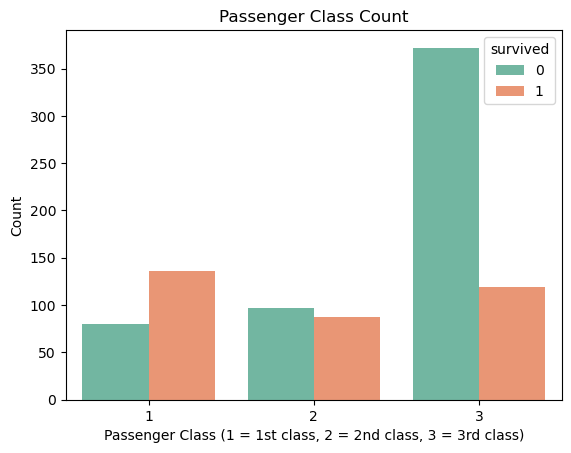

In [144]:
# 'p_class'
sns.countplot(x='p_class', hue='survived',data=df, palette='Set2')
plt.title('Passenger Class Count')
plt.xlabel('Passenger Class (1 = 1st class, 2 = 2nd class, 3 = 3rd class)')
plt.ylabel('Count')
plt.show()

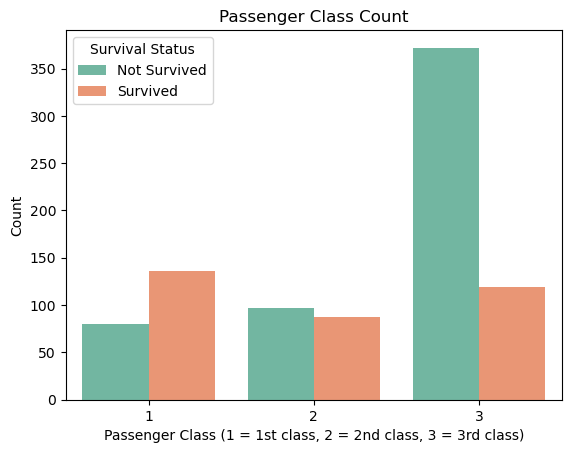

In [145]:
sns.countplot(x='p_class', hue='survived', data=df, palette='Set2')

# Title & axis labels
plt.title('Passenger Class Count')
plt.xlabel('Passenger Class (1 = 1st class, 2 = 2nd class, 3 = 3rd class)')
plt.ylabel('Count')

# Custom legend labels
plt.legend(title='Survival Status', labels=['Not Survived', 'Survived'])
plt.show()

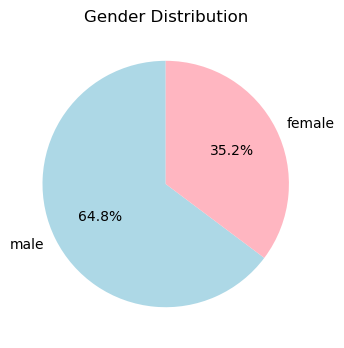

In [146]:
# Visualize the distribution of 'sex' using a pie chart (percentage)
sex_counts = df['sex'].value_counts()
labels = sex_counts.index
colors = ['lightblue', 'lightpink'] 

plt.figure(figsize=(4,4))
plt.pie(sex_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Gender Distribution')
plt.show()

<Axes: >

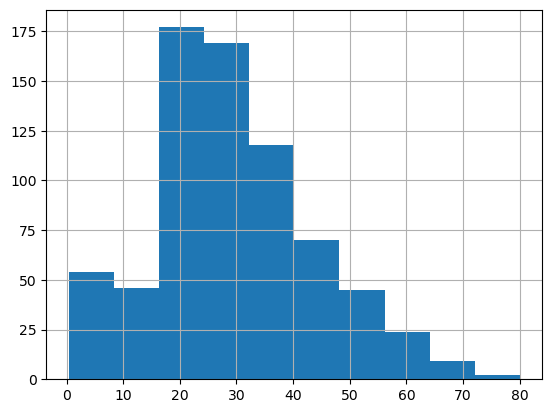

In [147]:
# Visualize the distribution of 'age' using a histogram
df["age"].hist()

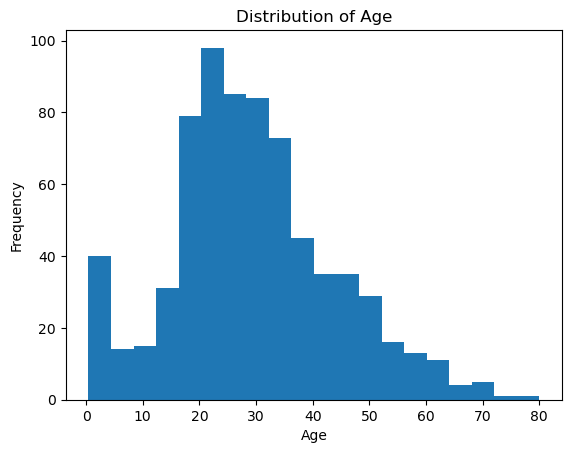

In [148]:
df['age'].plot(kind='hist', bins=20, title='Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

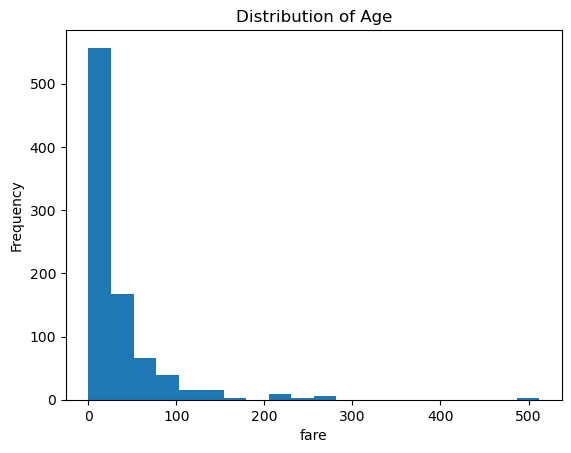

In [149]:
# Step 9: Visualize the distribution of 'fare' using a histogram
df['fare'].plot(kind='hist', bins=20, title='Distribution of Age')
plt.xlabel('fare')
plt.ylabel('Frequency')
plt.show()

### Data Preprocessing, Handling NA

In [151]:
df.isna().sum()

p_class       0
sex           0
age         177
fare          9
survived      0
dtype: int64

In [152]:
df.describe()

,p_class,age,fare,survived
count,891.000000,714.000000,882.000000,891.000000
mean,2.308642,29.699118,32.302838,0.383838
std,0.836071,14.526497,49.912534,0.486592
min,1.000000,0.420000,0.000000,0.000000
25%,2.000000,20.125000,7.895800,0.000000
50%,3.000000,28.000000,14.454200,0.000000
75%,3.000000,38.000000,31.000000,1.000000
max,3.000000,80.000000,512.329200,1.000000


In [153]:
# Fill in missing values in the 'age' and 'fare' columns with their median values
df["age"].median(), df["fare"].median()

(28.0, 14.4542)

In [154]:
df["age"]=df["age"].fillna(df["age"].median())
df.isna().sum()

p_class     0
sex         0
age         0
fare        9
survived    0
dtype: int64

In [155]:
df["fare"]=df["fare"].fillna(df["fare"].median())
df.isna().sum()

p_class     0
sex         0
age         0
fare        0
survived    0
dtype: int64

### One Hot Encoding

In [157]:
df["sex"].unique()

array(['male', 'female'], dtype=object)

In [158]:
# Encode the 'sex' column using one-hot encoding
df = pd.get_dummies(df, columns=['sex'], drop_first=True)
df.head()

,p_class,age,fare,survived,sex_male
0,3,22.0,7.2500,0,True
1,1,38.0,71.2833,1,False
2,3,26.0,14.4542,1,False
3,1,35.0,53.1000,1,False
4,3,35.0,8.0500,0,True


### Scaling

In [160]:
# Standardize the 'fare' column using StandardScaler
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the 'fare' column (reshape for single feature)
df['fare'] = scaler.fit_transform(df[['fare']])

In [161]:
df.head()

,p_class,age,fare,survived,sex_male
0,3,22.0,-0.500819,0,True
1,1,38.0,0.788518,1,False
2,3,26.0,-0.355760,1,False
3,1,35.0,0.422390,1,False
4,3,35.0,-0.484711,0,True


In [162]:
# Select the features and target variable for modeling
X = df.drop("survived",axis=1)
y = df["survived"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

### Model Training Using Gaussian Naive Bayes

In [164]:
# Initialize and train a Gaussian Naive Bayes model using the training data
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train,y_train)

#  Make predictions on the test set using the trained model
y_pred = model.predict(X_test)

### Model Evaluation

In [197]:
from sklearn.metrics import classification_report,confusion_matrix

cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       167
           1       0.75      0.69      0.72       101

    accuracy                           0.80       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268



In [199]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[144  23]
 [ 31  70]]


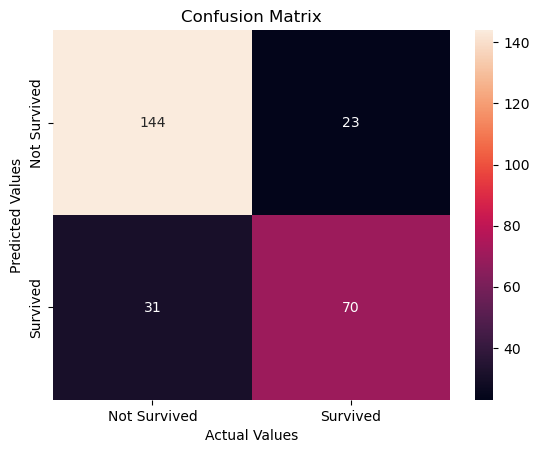

In [205]:
# Visualize the confusion matrix for the model
sns.heatmap(cm,annot=True,fmt="d",xticklabels=['Not Survived','Survived'],yticklabels=['Not Survived','Survived'])
plt.title("Confusion Matrix")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()